In [1]:
import cv2
import os
import cv2
import numpy as np
import tensorflow as tf
from matplotlib import pyplot as plt

folder_path1 = 'm01_child/'
folder_path2 = 'm10_child/'

image_files1 = [f for f in os.listdir(folder_path1) if f.lower().endswith(('.png', '.jpg', '.jpeg', '.gif', '.bmp'))]

image_files2 = [f for f in os.listdir(folder_path2) if f.lower().endswith(('.png', '.jpg', '.jpeg', '.gif', '.bmp'))]

images = []

for filename in image_files1:
    image_path = os.path.join(folder_path1, filename)
    image = cv2.imread(image_path)

    if image is not None:
        images.append(image)
    else:
        print(f"Failed to load image: {filename}")

for filename in image_files2:
    image_path = os.path.join(folder_path2, filename)
    image = cv2.imread(image_path)

    if image is not None:
        images.append(image)
    else:
        print(f"Failed to load image: {filename}")

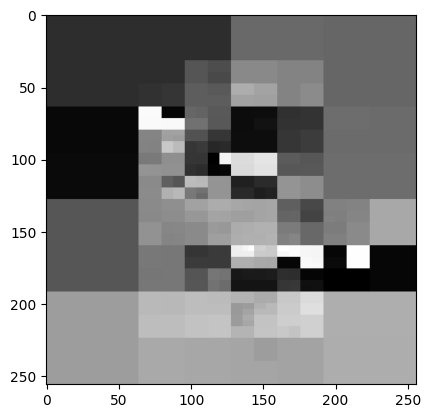

In [2]:
from matplotlib import pyplot as plt
total_sum = sum(images)

normalized_array = (total_sum - total_sum.min()) / (total_sum.max() - total_sum.min())

fig, ax = plt.subplots()

# Create the heatmap on the axis
heatmap = ax.imshow((normalized_array * 256).astype(np.uint8), cmap='viridis')  # 'viridis' is a colormap; you can choose any other colormap
#plt.colorbar(heatmap)  # Add a colorbar to the heatmap

# Show the plot
plt.show()

In [3]:
normalized_array.shape

(256, 256, 3)

In [4]:


paths_to_image = ["TCGA_CS_4943_20000902_18.tif"];
                  # "TCGA_CS_6665_20010817_18.tif",
                  # "TCGA_DU_5855_19951217_23.tif",
                  # "TCGA_DU_8166_19970322_25.tif"];

path_to_model = "clf-resnet-weights.hdf5";
model = tf.keras.models.load_model(path_to_model)
img_array = np.empty([len(paths_to_image),256,256,3]);
counter = 0
for path_to_image in paths_to_image:
    img = cv2.imread(path_to_image)
    img = img / 255.0 # we need to normalise (but see what happens if you don't)
    img = np.expand_dims(img, axis=0)
    img_array[counter] = img
    counter += 1
img_array = img_array.astype('float32')

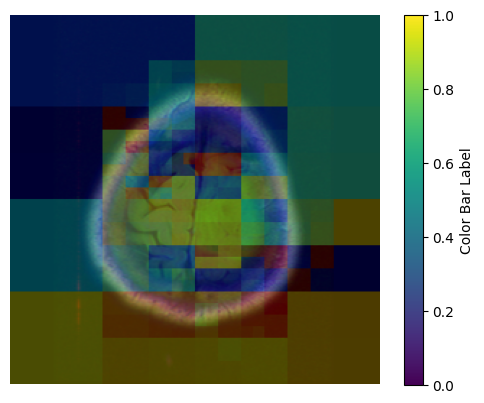

In [5]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import Normalize
from matplotlib.cm import ScalarMappable

colormap = plt.get_cmap('viridis')  # Choose any colormap
heatmap_colored = cv2.applyColorMap((normalized_array * 255).astype(np.uint8), cv2.COLORMAP_JET)
superposed_image = cv2.addWeighted((img_array[0] * 256).astype(np.uint8), 0.7, heatmap_colored, 0.3, 0)

# Create a color bar for the heatmap
cmap = plt.get_cmap('viridis')  # Choose the same colormap used for the heatmap
norm = Normalize(vmin=0, vmax=1)  # Specify the range of the color bar
scalar_mappable = ScalarMappable(cmap=cmap, norm=norm)
scalar_mappable.set_array([])

# Display the superposed image inline within the Jupyter Notebook
fig, ax = plt.subplots()
ax.imshow(cv2.cvtColor(superposed_image, cv2.COLOR_BGR2RGB))
ax.axis('off')  # Turn off axis labels
cbar = plt.colorbar(scalar_mappable, ax=ax, orientation='vertical', pad=0.05)
cbar.set_label('Color Bar Label')  # Set the label for the color bar

plt.show()